Project statement
The purpose of the project is to forecast six time series (no particular topic) using Python.

Initially we will import some useful libraries into the program

In [123]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Set seed (42: lucky number)

In [124]:
random.seed(42)

We will use os to retrieve the files used in the program

In [125]:
for dirname, _, filenames in os.walk('C:/Users/panag/Desktop/sarima-model'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/panag/Desktop/sarima-model\arima.ipynb
C:/Users/panag/Desktop/sarima-model\sample_submission.csv
C:/Users/panag/Desktop/sarima-model\sarima-models.zip
C:/Users/panag/Desktop/sarima-model\sarimax.ipynb
C:/Users/panag/Desktop/sarima-model\test.csv
C:/Users/panag/Desktop/sarima-model\train.csv
C:/Users/panag/Desktop/sarima-model\1\Time Series Forecasting with SARIMA.ipynb
C:/Users/panag/Desktop/sarima-model\2\time-series-forecasting-with-sarima.ipynb


Pandas is a software library written for the Python programming language for data manipulation and analysis. We will use pandas to read the csv files and convert them to dataframes

In [73]:
train = pd.read_csv('C:/Users/panag/Desktop/sarima-model/train.csv')
test = pd.read_csv('C:/Users/panag/Desktop/sarima-model/test.csv')
submission = pd.read_csv('C:/Users/panag/Desktop/sarima-model/sample_submission.csv')

In [75]:
train.isna().sum()

id        0
Serie     0
indice    0
y         0
dtype: int64

In [77]:
test.isna().sum()

id        0
Serie     0
indice    0
dtype: int64

In [79]:
submission_id = submission['id']

Using a loop to break down the six time series

In [80]:
num_unique = train['Serie'].unique()

In [81]:
for i in train['Serie'].unique():
    locals()['train_' + str(i)] = train[(train.Serie == i)]
    locals()['test_' + str(i)] = test[(test.Serie == i)]

In [82]:
print(train_1.shape, train_2.shape, train_3.shape, train_4.shape, train_5.shape, train_6.shape)
print(test_1.shape, test_2.shape, test_3.shape, test_4.shape, test_5.shape, test_6.shape)

(96, 4) (80, 4) (78, 4) (95, 4) (135, 4) (306, 4)
(32, 3) (26, 3) (26, 3) (32, 3) (45, 3) (102, 3)


Dropping id and Serie

In [83]:
for i in range(1, len(num_unique)+1,1):
    locals()['train_' + str(i)].drop(['id', 'Serie'], axis=1, inplace=True)
    locals()['test_' + str(i)].drop(['id', 'Serie'], axis=1, inplace=True)
    
    locals()['train_' + str(i)]['indice'] = ['train_' + str(i)].index
    locals()['test_' + str(i)]['indice'] = ['test_' + str(i)].index
    
    locals()['train_' + str(i)].drop('indice', axis=1, inplace=True)
    locals()['test_' + str(i)].drop('indice', axis=1, inplace=True)

In [85]:
print(train_1.shape, train_2.shape, train_3.shape, train_4.shape, train_5.shape, train_6.shape)
print(test_1.shape, test_2.shape, test_3.shape, test_4.shape, test_5.shape, test_6.shape)

(96, 1) (80, 1) (78, 1) (95, 1) (135, 1) (306, 1)
(32, 0) (26, 0) (26, 0) (32, 0) (45, 0) (102, 0)


Plotting the time series

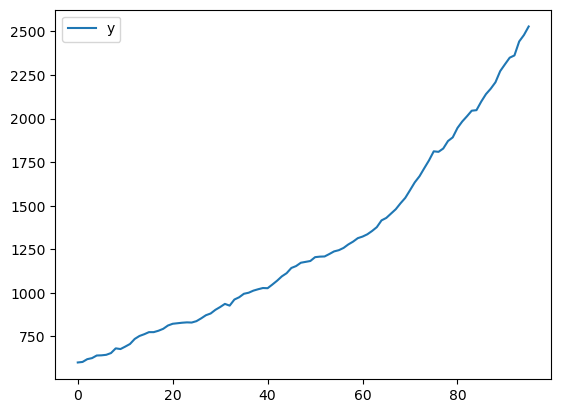

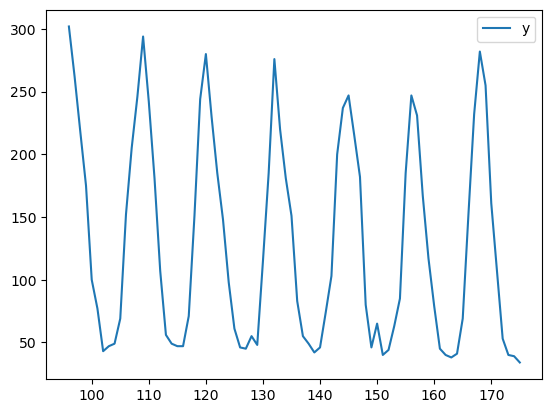

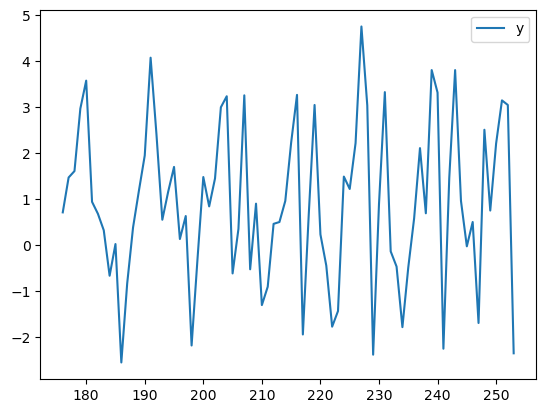

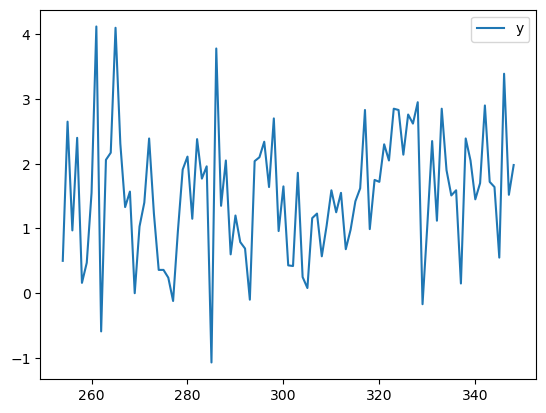

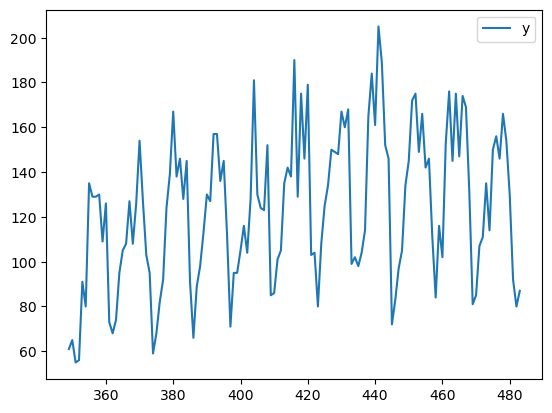

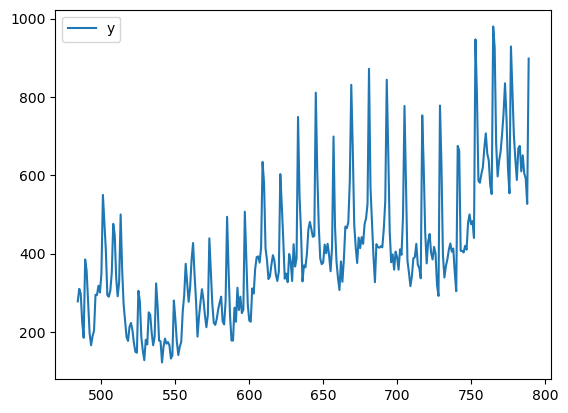

In [86]:
for i in range(1, len(num_unique)+1,1):
    locals()['train_' + str(i)].plot()

Create a histogram of the time series

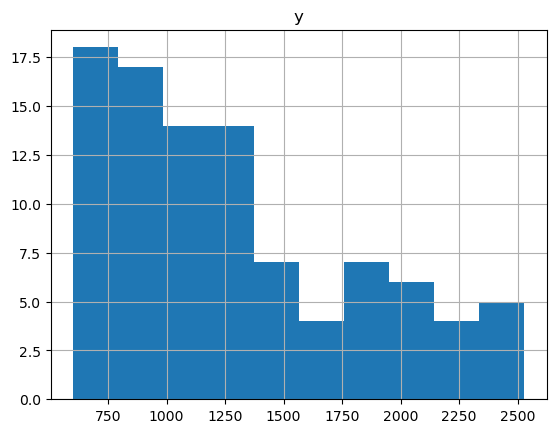

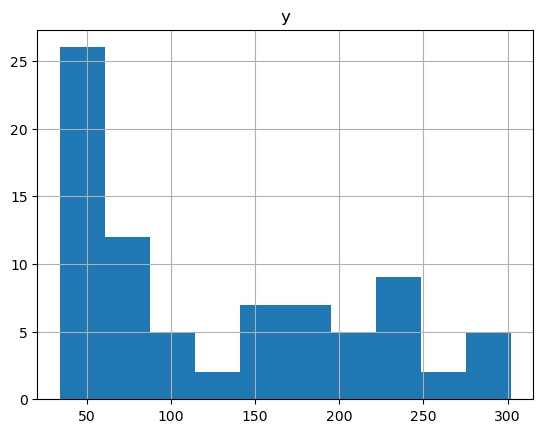

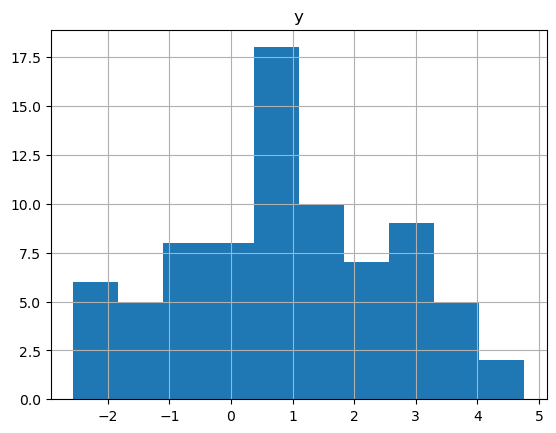

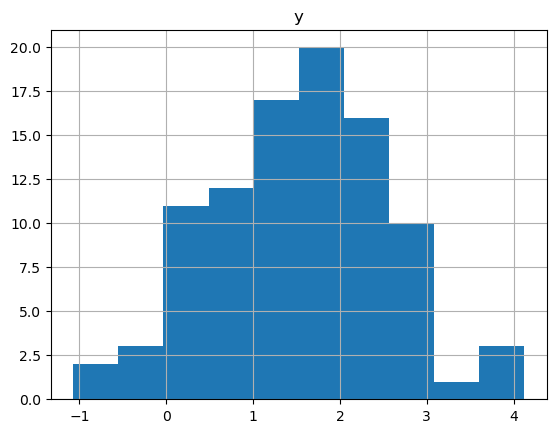

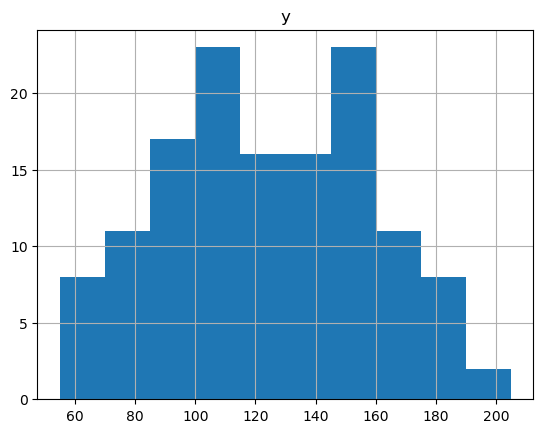

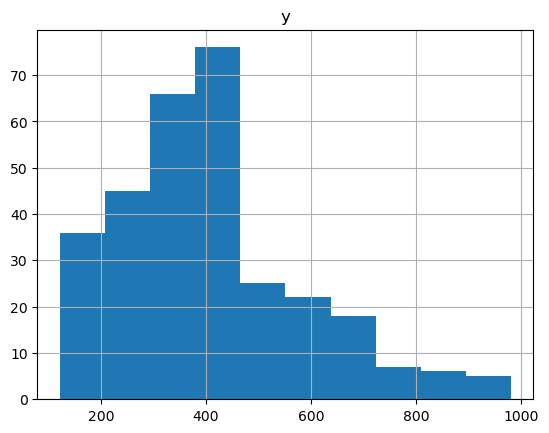

In [87]:
for i in range(1, len(num_unique)+1,1):
    locals()['train_' + str(i)].hist(); plt.show()

Smooth the time series

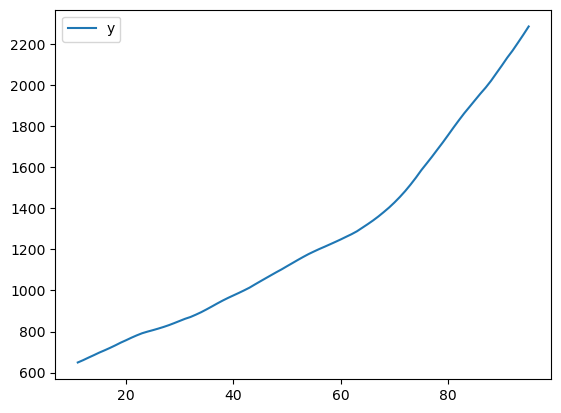

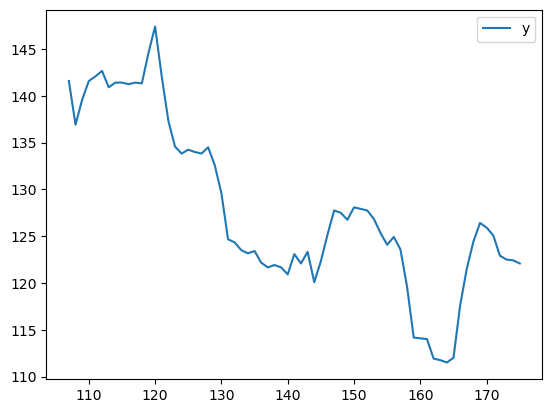

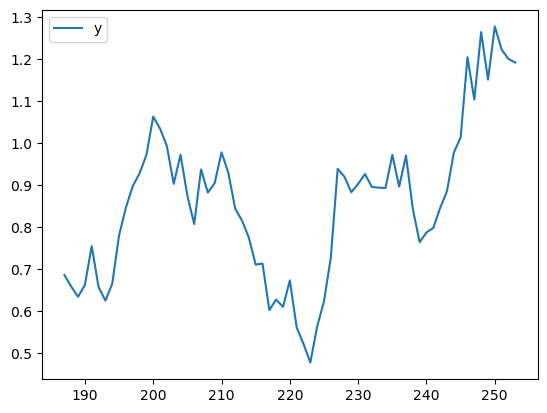

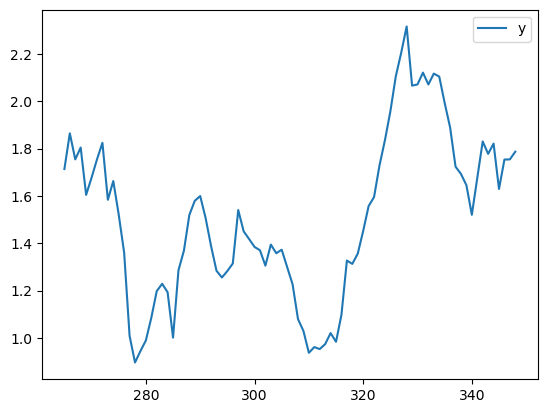

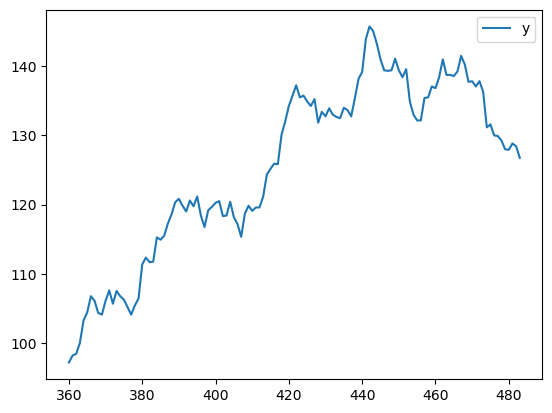

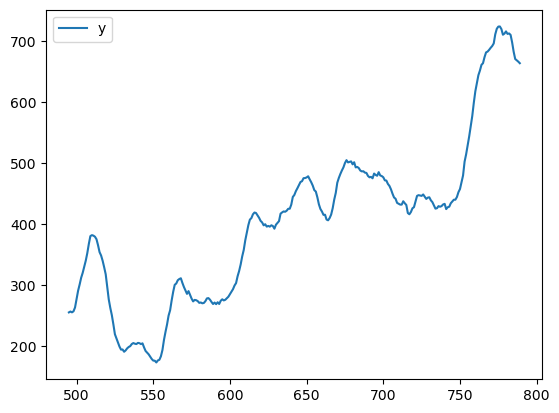

In [88]:
for i in range(1, len(num_unique)+1,1):
    locals()['train_' + str(i)].rolling(window=12).mean().plot()

Checking for stationarity

In [89]:
from statsmodels.tsa.stattools import adfuller

# We will look for p-value. In case, p-value is less than 0.05, the time series
# data can said to have stationarity

for i in range(1, len(num_unique)+1,1):
    adf_result = adfuller(locals()['train_' + str(i)],autolag='AIC')
    print(['train_' + str(i)])
    print("P-value: ", adf_result[1])
    print("ADF statistic:", adf_result[0])

['train_1']
P-value:  1.0
ADF statistic: 8.690476789234202
['train_2']
P-value:  0.6293394879238593
ADF statistic: -1.2996345565313945
['train_3']
P-value:  0.6834372647837543
ADF statistic: -1.1769371507680075
['train_4']
P-value:  1.0359191970985813e-06
ADF statistic: -5.641130684054363
['train_5']
P-value:  0.2513874762586472
ADF statistic: -2.083043139957554
['train_6']
P-value:  0.6009975027051662
ADF statistic: -1.3606318861012545


Splitting the dataframes into testing and validation sets

In [90]:
for i in range(1, len(num_unique)+1,1):
    train_length = int(len(locals()[('train_' + str(i))]) * 0.9)
    copy_train = locals()['train_' + str(i)]
    
    locals()['train_' + str(i)] = copy_train[: train_length]
    locals()['val_' + str(i)] = copy_train[train_length :]

In [91]:
print(np.asarray(train_1).shape, np.asarray(train_2).shape, np.asarray(train_3).shape, np.asarray(train_4).shape, np.asarray(train_5).shape, np.asarray(train_6).shape)
print(np.asarray(val_1).shape, np.asarray(val_2).shape, np.asarray(val_3).shape, np.asarray(val_4).shape, np.asarray(val_5).shape, np.asarray(val_6).shape)
print(test_1.shape, test_2.shape, test_3.shape, test_4.shape, test_5.shape, test_6.shape)

(86, 1) (72, 1) (70, 1) (85, 1) (121, 1) (275, 1)
(10, 1) (8, 1) (8, 1) (10, 1) (14, 1) (31, 1)
(32, 0) (26, 0) (26, 0) (32, 0) (45, 0) (102, 0)


In [92]:
for i in range(1, len(num_unique)+1,1):
    locals()['y_train_' + str(i)] = locals()['train_' + str(i)]['y']
    locals()['y_val_' + str(i)] = locals()['val_' + str(i)]['y']

In [93]:
print(np.asarray(y_train_1).shape, np.asarray(y_train_2).shape, np.asarray(y_train_3).shape, np.asarray(y_train_4).shape, np.asarray(y_train_5).shape, np.asarray(y_train_6).shape)
print(np.asarray(y_val_1).shape, np.asarray(y_val_2).shape, np.asarray(y_val_3).shape, np.asarray(y_val_4).shape, np.asarray(y_val_5).shape, np.asarray(y_val_6).shape)

(86,) (72,) (70,) (85,) (121,) (275,)
(10,) (8,) (8,) (10,) (14,) (31,)


Check for null values

Now we will create the ARIMA model

In [94]:
from statsmodels.tsa.arima.model import ARIMA

def get_best_arima(y_train, y_val):
    p_values = range(0,8)
    q_values = range(0,8)
    d_values = range(0,3)

# evaluate combinations of p, d and q values for an ARIMA model

    best_score, best_cfg = float("inf"), None

    for p in p_values:
      for d in d_values:
        for q in q_values:
          order = (p,d,q)
          try:
            model= ARIMA(y_train.values, order=order).fit()
            y_hat = model.predict(start=len(y_train), end=((len(y_train)+len(y_val))-1))
            rmse = np.sqrt(np.square(np.subtract(y_val.values, y_hat)).mean())
            if rmse < best_score:
              best_score, best_cfg = rmse, order
              print('ARIMA%s RMSE=%.3f' % (order,rmse))
          except:
            continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [95]:
from statsmodels.tsa.arima.model import ARIMA

model_1 = ARIMA(y_train_1, order=(0, 2, 0)).fit()
print(model_1.aic)

700.1867569058454


In [96]:
from statsmodels.tsa.arima.model import ARIMA

model_2 = ARIMA(y_train_2, order=(7, 2, 4)).fit()
print(model_2.aic)

673.7982081874123


In [97]:
from statsmodels.tsa.arima.model import ARIMA

model_3 = ARIMA(y_train_3, order=(5, 2, 6)).fit()
print(model_3.aic)

280.67937778498145


In [98]:
from statsmodels.tsa.arima.model import ARIMA

model_4 = ARIMA(y_train_4, order=(7, 2, 7)).fit()
print(model_4.aic)

267.25948992450003


In [99]:
from statsmodels.tsa.arima.model import ARIMA

model_5 = ARIMA(y_train_5, order=(2, 0, 7)).fit()
print(model_5.aic)

1091.1686182367825


In [100]:
from statsmodels.tsa.arima.model import ARIMA

model_6 = ARIMA(y_train_6, order=(7, 2, 6)).fit()
print(model_6.aic)

3230.607408276668


In this part we will make predictions and plot

In [101]:
def get_yhat(y_train, y_val, model):
    #set index
    y_train_idx = y_train.index
    y_val_idx = y_val.index
# Make the predictions
    y_hat = model.predict(start=len(y_train), end=((len(y_train)+len(y_val))-1), dynamic=False)
    
# Plot the prediction vs test data
    plt.figure(figsize=(10,4))
    plt.plot(y_train_idx, y_train, label='X_train')
    plt.plot(y_val_idx,y_val, label='X_val')
    plt.plot(y_val_idx, y_hat, label='ARIMA Forecast')
    plt.legend(loc='best')
    plt.title("ARIMA Forecast")
    plt.show()

    return y_hat

In [102]:
# Calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions.ravel() - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()

    print(model_name + ':')
    print('Mean Absolute Error: ', mae)
    print('Root Mean Square Error: ', rmse)
    print('')

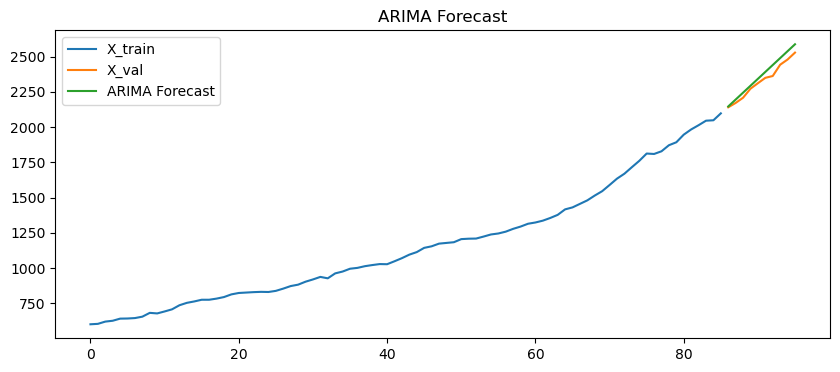

In [103]:
y_hat_1 = get_yhat(y_train_1, y_val_1, model_1)

In [104]:
evaluate_prediction(y_hat_1, y_val_1, 'ARIMA')

ARIMA:
Mean Absolute Error:  40.30000000014256
Root Mean Square Error:  45.08769233409464



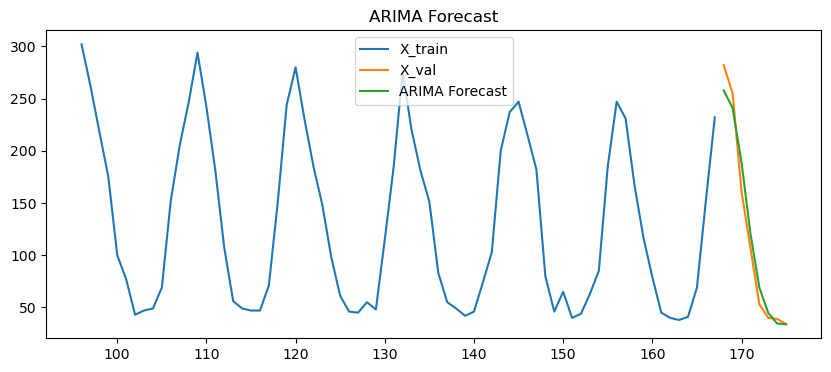

In [105]:
y_hat_2 = get_yhat(y_train_2, y_val_2, model_2)

In [106]:
evaluate_prediction(y_hat_2, y_val_2, 'ARIMA')

ARIMA:
Mean Absolute Error:  13.126039801910371
Root Mean Square Error:  15.991698747199314



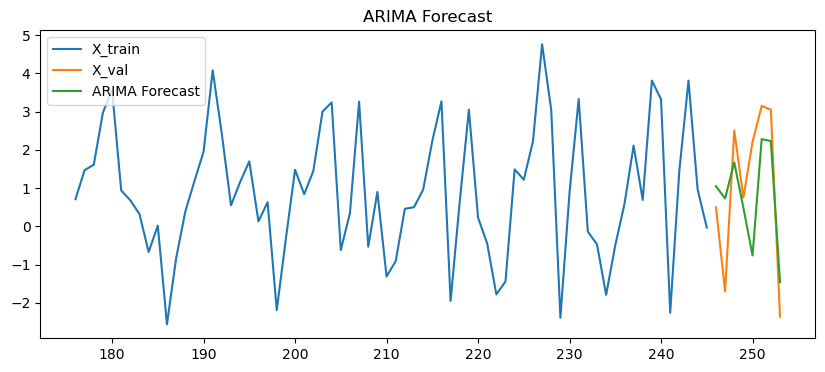

In [107]:
y_hat_3 = get_yhat(y_train_3, y_val_3, model_3)

In [108]:
evaluate_prediction(y_hat_3, y_val_3, 'ARIMA')

ARIMA:
Mean Absolute Error:  1.205556618255324
Root Mean Square Error:  1.501695117848313



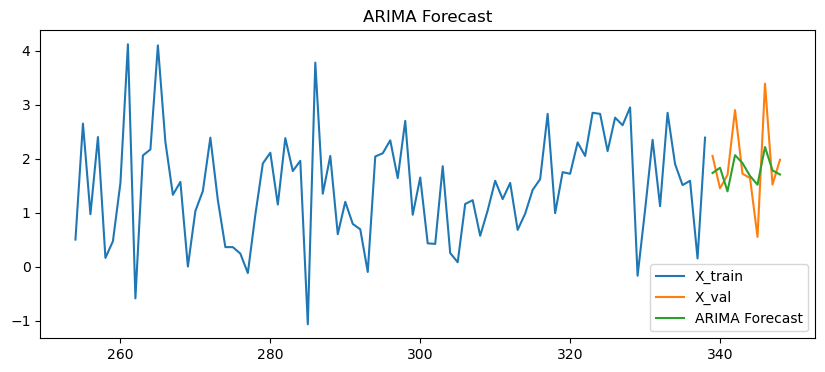

In [109]:
y_hat_4 = get_yhat(y_train_4, y_val_4, model_4)

In [110]:
evaluate_prediction(y_hat_4, y_val_4, 'ARIMA')

ARIMA:
Mean Absolute Error:  0.4752485279733839
Root Mean Square Error:  0.5946602606559287



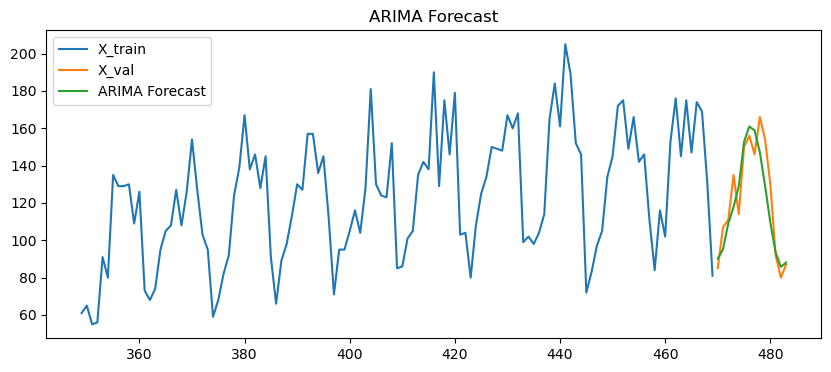

In [111]:
y_hat_5 = get_yhat(y_train_5, y_val_5, model_5)

In [112]:
evaluate_prediction(y_hat_5, y_val_5, 'ARIMA')

ARIMA:
Mean Absolute Error:  10.31271665554172
Root Mean Square Error:  12.878633007247311



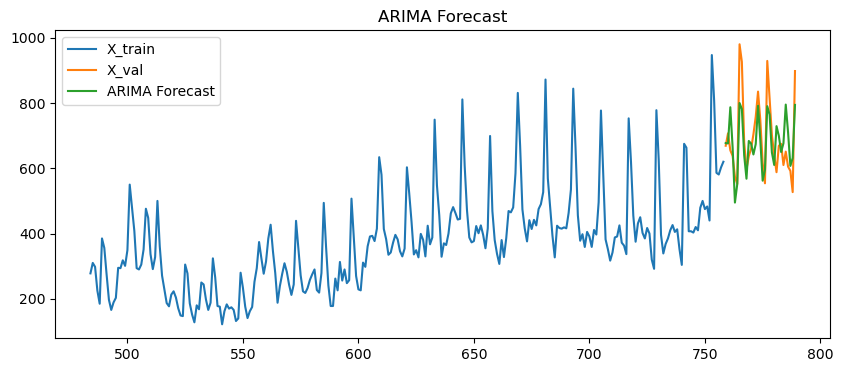

In [113]:
y_hat_6 = get_yhat(y_train_6, y_val_6, model_6)

In [114]:
evaluate_prediction(y_hat_6, y_val_6, 'ARIMA')

ARIMA:
Mean Absolute Error:  67.35945071308466
Root Mean Square Error:  82.2970046428165



Now we will make predictions on test set

In [115]:
def get_pred(model, y_train, y_val, test):
    
    len_df = len(y_train) + len(y_val)
    len_test = len(test)
    
# Make the predictions
    pred = model.predict(start=len_df, end=(len_df+len_test)-1, dynamic=False)
    return pred

In [116]:
pred_1 = get_pred(model_1, y_train_1, y_val_1, test_1)
pred_1

96     2636.0
97     2685.0
98     2734.0
99     2783.0
100    2832.0
101    2881.0
102    2930.0
103    2979.0
104    3028.0
105    3077.0
106    3126.0
107    3175.0
108    3224.0
109    3273.0
110    3322.0
111    3371.0
112    3420.0
113    3469.0
114    3518.0
115    3567.0
116    3616.0
117    3665.0
118    3714.0
119    3763.0
120    3812.0
121    3861.0
122    3910.0
123    3959.0
124    4008.0
125    4057.0
126    4106.0
127    4155.0
Name: predicted_mean, dtype: float64

In [117]:
pred_2 = get_pred(model_2, y_train_2, y_val_2, test_2)
pred_2

80      52.142565
81      97.551337
82     163.937981
83     228.132811
84     260.088157
85     244.176399
86     191.579506
87     130.162015
88      83.284728
89      57.665776
90      48.012649
91      50.492699
92      70.006597
93     113.157784
94     174.588485
95     232.505889
96     260.343932
97     245.244040
98     197.046860
99     140.093528
100     95.722890
101     71.051001
102     62.307575
103     66.367921
104     86.883995
105    128.352813
Name: predicted_mean, dtype: float64

In [118]:
pred_3 = get_pred(model_3, y_train_3, y_val_3, test_3)
pred_3

78     0.761183
79     3.072850
80     0.195656
81    -0.158699
82     1.748305
83     1.154698
84     1.291250
85     0.829308
86    -0.067701
87     2.240366
88     2.278682
89    -1.064171
90     1.001377
91     3.416139
92     0.303565
93    -0.197808
94     2.370468
95     1.557554
96     0.939733
97     1.177524
98     0.661271
99     2.149368
100    2.274017
101   -0.551713
102    1.249165
103    3.616628
Name: predicted_mean, dtype: float64

In [119]:
pred_4 = get_pred(model_4, y_train_4, y_val_4, test_4)
pred_4

95     1.647367
96     2.297820
97     1.678305
98     1.748216
99     1.826738
100    2.276436
101    1.628906
102    1.812661
103    2.005769
104    2.187092
105    1.630634
106    1.907280
107    2.143290
108    2.070117
109    1.679760
110    2.023888
111    2.218720
112    1.960023
113    1.771035
114    2.143568
115    2.231210
116    1.882796
117    1.894926
118    2.245027
119    2.194922
120    1.854509
121    2.036865
122    2.311688
123    2.132866
124    1.880706
125    2.178868
126    2.336099
Name: predicted_mean, dtype: float64

In [120]:
pred_5 = get_pred(model_5, y_train_5, y_val_5, test_5)
pred_5

135     99.914379
136    118.050531
137    137.576963
138    153.219208
139    160.759384
140    158.173527
141    146.174835
142    128.017052
143    108.612148
144     93.201567
145     85.940471
146     88.777403
147    100.931409
148    119.106951
149    138.387468
150    153.565312
151    160.548322
152    157.463112
153    145.157629
154    126.968169
155    107.814848
156     92.870759
157     86.164789
158     89.495456
159    101.948582
160    120.148151
161    139.171520
162    153.880892
163    160.310912
164    156.737635
165    144.140695
166    125.934796
167    107.044086
168     92.570336
169     86.415127
170     90.228146
171    102.965073
172    121.173556
173    139.928952
174    154.166231
175    160.047810
176    155.997945
177    143.124849
178    124.917495
179    106.300018
Name: predicted_mean, dtype: float64

In [121]:
pred_6 = get_pred(model_6, y_train_6, y_val_6, test_6)
pred_6

306    758.088835
307    662.297723
308    646.012157
309    761.065577
310    720.611533
          ...    
403    826.553624
404    846.698377
405    907.591501
406    858.752359
407    833.570864
Name: predicted_mean, Length: 102, dtype: float64

Concatenate six predictions into one series

In [122]:
predictions = pd.concat([pred_1, pred_2, pred_3, pred_4, pred_5, pred_6])
predictions

96     2636.000000
97     2685.000000
98     2734.000000
99     2783.000000
100    2832.000000
          ...     
403     826.553624
404     846.698377
405     907.591501
406     858.752359
407     833.570864
Name: predicted_mean, Length: 263, dtype: float64

At last, we will prepare the submission file

In [64]:
my_submission = pd.DataFrame({'id': submission_id, 'y': predictions.values})
my_submission.to_csv('my_submission.csv', index=False)
my_submission = pd.read_csv('my_submission.csv')
my_submission

,id,y
0,791,2636.000000
1,792,2685.000000
2,793,2734.000000
3,794,2783.000000
4,795,2832.000000
...,...,...
258,1049,826.553624
259,1050,846.698377
260,1051,907.591501
261,1052,858.752359
